<a href="https://colab.research.google.com/github/Shravanya178/MLDL_EXPS/blob/main/MLDL_EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [71]:
df = pd.read_csv("CEEW - IRES Data.csv", low_memory=False)

print("Dataset shape:", df.shape)


Dataset shape: (14851, 517)


In [72]:
df['q326_satis_electricity'].value_counts(dropna=False)


,count
q326_satis_electricity,
5.0,7648
4.0,3614
3.0,1145
2.0,1055
1.0,945
NaN,444


In [73]:
df_clean = df[df['q326_satis_electricity'].isin([1,2,3,4,5])].copy()

df_clean['High_Satisfaction'] = df_clean['q326_satis_electricity'].apply(
    lambda x: 1 if x >= 4 else 0
)

print("Target distribution:")
print(df_clean['High_Satisfaction'].value_counts())


Target distribution:
High_Satisfaction
1    11262
0     3145
Name: count, dtype: int64


In [74]:
X = df_clean[['q232_mobile_smart_n',            # smartphones
              'q314_a_online_pay_ever_yn',      # digital payment
              'q312_grid_elec_meter_yn',        # meter presence
              'q302_grid_hrs_no',               # power availability
              'q308_grid_voltage_low_app',      # voltage issue
              'asset_index_1',                  # wealth
              'q208_priminc_earner_edu',        # education
              'q202_resp_age',                  # age
              'q213_no_members']]               # household size

y = df_clean['High_Satisfaction']


In [75]:
data = pd.concat([X, y], axis=1).dropna()

X = data.drop('High_Satisfaction', axis=1)
y = data['High_Satisfaction']

print("Final class distribution:")
print(y.value_counts())


Final class distribution:
High_Satisfaction
1    7058
0    1505
Name: count, dtype: int64


In [76]:
X = pd.get_dummies(X, drop_first=True)

print("Feature shape after encoding:", X.shape)


Feature shape after encoding: (8563, 9)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train distribution:")
print(y_train.value_counts())

print("Test distribution:")
print(y_test.value_counts())


Train distribution:
High_Satisfaction
1    5646
0    1204
Name: count, dtype: int64
Test distribution:
High_Satisfaction
1    1412
0     301
Name: count, dtype: int64


In [78]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [79]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8178633975481612

Confusion Matrix:
[[   9  292]
 [  20 1392]]

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.03      0.05       301
           1       0.83      0.99      0.90      1412

    accuracy                           0.82      1713
   macro avg       0.57      0.51      0.48      1713
weighted avg       0.74      0.82      0.75      1713



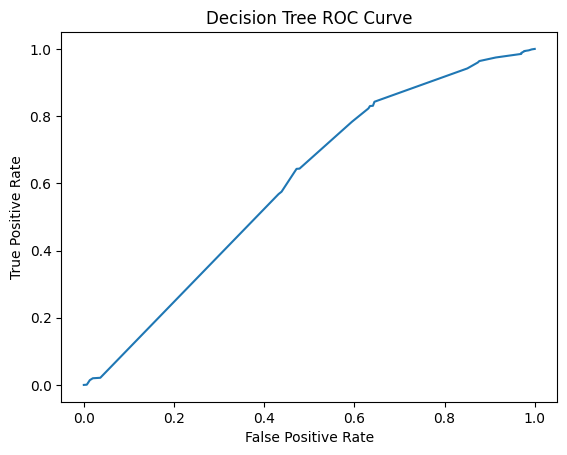

Decision Tree AUC: 0.5982819308631284


In [80]:
y_prob_dt = dt.predict_proba(X_test)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

print("Decision Tree AUC:", roc_auc_score(y_test, y_prob_dt))


In [85]:
rf_balanced = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(X_train, y_train)

y_pred_rf = rf_balanced.predict(X_test)


In [86]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

y_prob_rf = rf_balanced.predict_proba(X_test)[:,1]
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))



Random Forest Accuracy: 0.8178633975481612
[[  62  239]
 [  73 1339]]
              precision    recall  f1-score   support

           0       0.46      0.21      0.28       301
           1       0.85      0.95      0.90      1412

    accuracy                           0.82      1713
   macro avg       0.65      0.58      0.59      1713
weighted avg       0.78      0.82      0.79      1713

Random Forest AUC: 0.6791137661995426


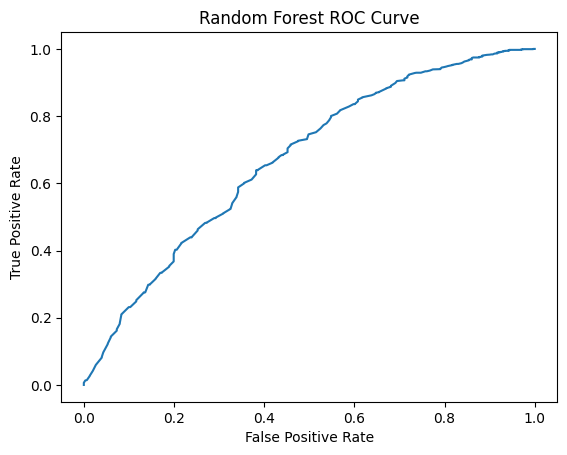

Random Forest AUC: 0.6701528427432637


In [87]:
y_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))


In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


In [89]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:,1]

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Tuned RF AUC:", roc_auc_score(y_test, y_prob_best))


Tuned RF Accuracy: 0.8190309398715704
[[  66  235]
 [  75 1337]]
              precision    recall  f1-score   support

           0       0.47      0.22      0.30       301
           1       0.85      0.95      0.90      1412

    accuracy                           0.82      1713
   macro avg       0.66      0.58      0.60      1713
weighted avg       0.78      0.82      0.79      1713

Tuned RF AUC: 0.6788408327294289


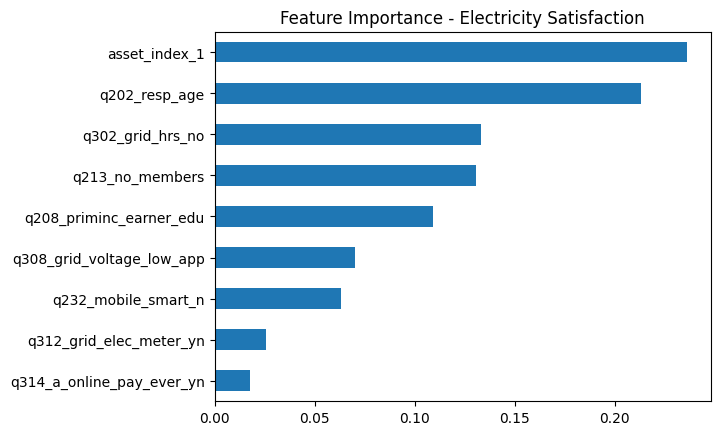

In [84]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values().plot(kind='barh')
plt.title("Feature Importance - Electricity Satisfaction")
plt.show()
